# NFL DRAFT ANALYSIS 

#### This project uses NFL draft data from 1985 to 2015, sourced from https://www.kaggle.com/datasets/ulrikthygepedersen/nfl-draft-1985-2015/data. The dataset includes player draft information, career statistics, and accolades, allowing for analysis of draft trends, positional outcomes, and long-term player success. The goal of this project is to clean and explore the data, evaluate drafting patterns, and develop insights into how the Green Bay Packers’ draft history compares to league-wide trends.

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

draft = pd.read_csv("C:/Users/brand/OneDrive/Documents/Data Sets/nfl_draft.csv")
#Drop unnecssary columns
draft.drop(['column_a', 'player_id'], inplace= True, axis = 1)
#All inputs to hof are no so it was removed for lack of valuable information 
draft.drop('hof', inplace = True, axis = 1)


#Data was lost in transferring the player_id so a custom player_id was made
draft['player_id'] = draft['player'] + "_" + draft['year'].astype(str) + "_" + draft['tm']


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Removes width limit
pd.set_option('display.max_colwidth', None)  # Show full content of each cell

# pd.reset_option('all')


In [3]:
#Split the data up into positional groups for ease of cleaning 

# positions = ['QB', 'OLB', 'WR', 'T', 'DE', 'RB', 'CB', 'NT', 'DT', 'C', 'G', 'FS', 'ILB', 'SS', 'TE', 'FB', 'S', 'P', 'LS', 'LB', 'OL', 'DB','K', 'DL', 'KR']

# Quaterbacks = draft[draft['pos'] == 'QB']
# Quaterbacks.drop(['column_a','player_id','position_standard', 'sk', 'to', 'tkl', 'def_int', 'ap1', 'pb', 'st', 'rec_yds', 'rec', 'rec_tds'], inplace=True, axis = 1)

# print(draft.columns)
# print(draft["player"].unique())
# draft['column_a'].unique()

### Data Wrangling/ Cleaning

In [3]:
# Consolidate to 32 teams replacing old team abbreviations with the new ones 
draft['tm'] = draft['tm'].replace({
    'PHO': 'ARI',
    'OAK': 'RAI',
    'STL': 'PIT'
})

# Fill in missing ages with the median age 
draft['age'] = draft['age'].fillna(round(draft['age'].median()))

# The to variable seems to be incomplete but through some EDA it seems most of those players do not have games played (g) numbers so I will be 
# cautious and replace the missing values with the year they were drafted 
draft['to'] = draft['to'].fillna(draft['year'])

# Replace missing stats with 0 assuming the player never attempted or accomplished one in his career 

stats_with_na = ['carav', 'drav', 'g', 'cmp',
       'pass_att', 'pass_yds', 'pass_td', 'pass_int', 'rush_att', 'rush_yds',
       'rush_tds', 'rec', 'rec_yds', 'rec_tds', 'tkl', 'def_int', 'sk']


for stat in stats_with_na: 
    draft[stat] = draft[stat].fillna(0)

print(draft.isnull().sum())

# Note: Some players have missing values for college_univ. 
# These may represent players who did not attend college, transferred between schools, or missing data from the source. 
# I leave these values as missing and exclude them from any college-based analysis.”

year                    0
rnd                     0
pick                    0
tm                      0
player                  0
pos                     0
position_standard       0
first4av                0
age                     0
to                      0
ap1                     0
pb                      0
st                      0
carav                   0
drav                    0
g                       0
cmp                     0
pass_att                0
pass_yds                0
pass_td                 0
pass_int                0
rush_att                0
rush_yds                0
rush_tds                0
rec                     0
rec_yds                 0
rec_tds                 0
tkl                     0
def_int                 0
sk                      0
college_univ         3430
player_id               0
dtype: int64


## Exploratory Data Analysis

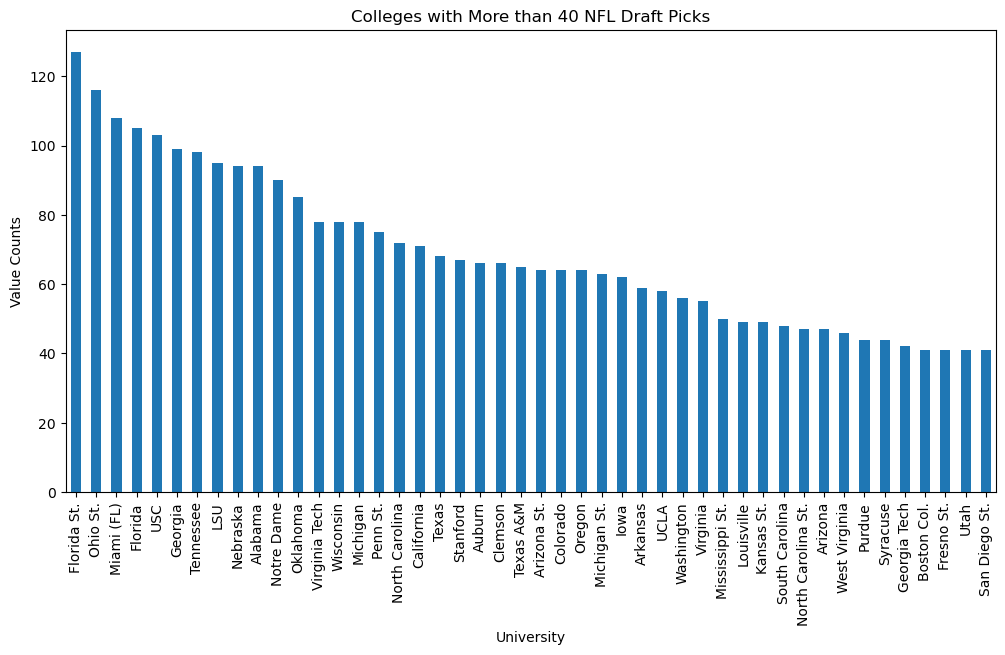

In [4]:
#Examining which universities have the most athletes selected by the NFL 
colleges = draft['college_univ'].value_counts()
colleges = colleges[colleges >= 40]

plt.figure(figsize=(12,6))

colleges.plot(kind='bar')

plt.xlabel('University')
plt.ylabel('Value Counts')
plt.title('Colleges with More than 40 NFL Draft Picks')
plt.show()

This bar chart shows a clear trend for the teams with the top draft prospects. While there are quite a few teams that have more than 40 players drafted the top 10 teams are not very surpirising. The top 10 are comprised of teams that have been historically very good and play in respected conferences (i.e. ACC, SEC, and Big Ten). Florida St. has by far the most players drafted. Interestingly, the state of florida has 3 of the top 5 teams in amount of players drafted. 

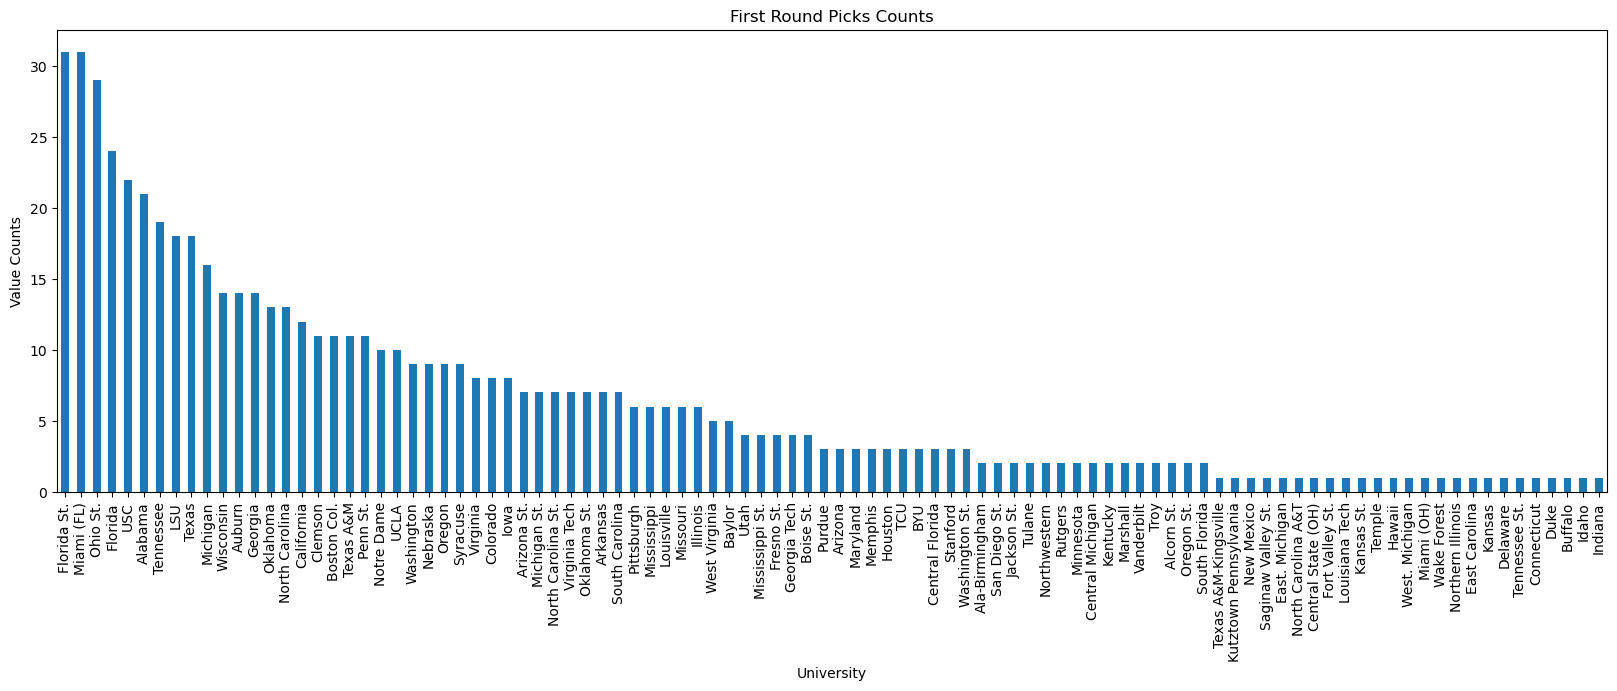

In [5]:
#Examining which universities produce the most first round picks
college_round = draft[draft['rnd'] == 1]['college_univ'].value_counts()

plt.figure(figsize=(20,6))
college_round.plot(kind='bar')
plt.xlabel('University')
plt.ylabel('Value Counts')
plt.title('First Round Picks Counts')
plt.show()

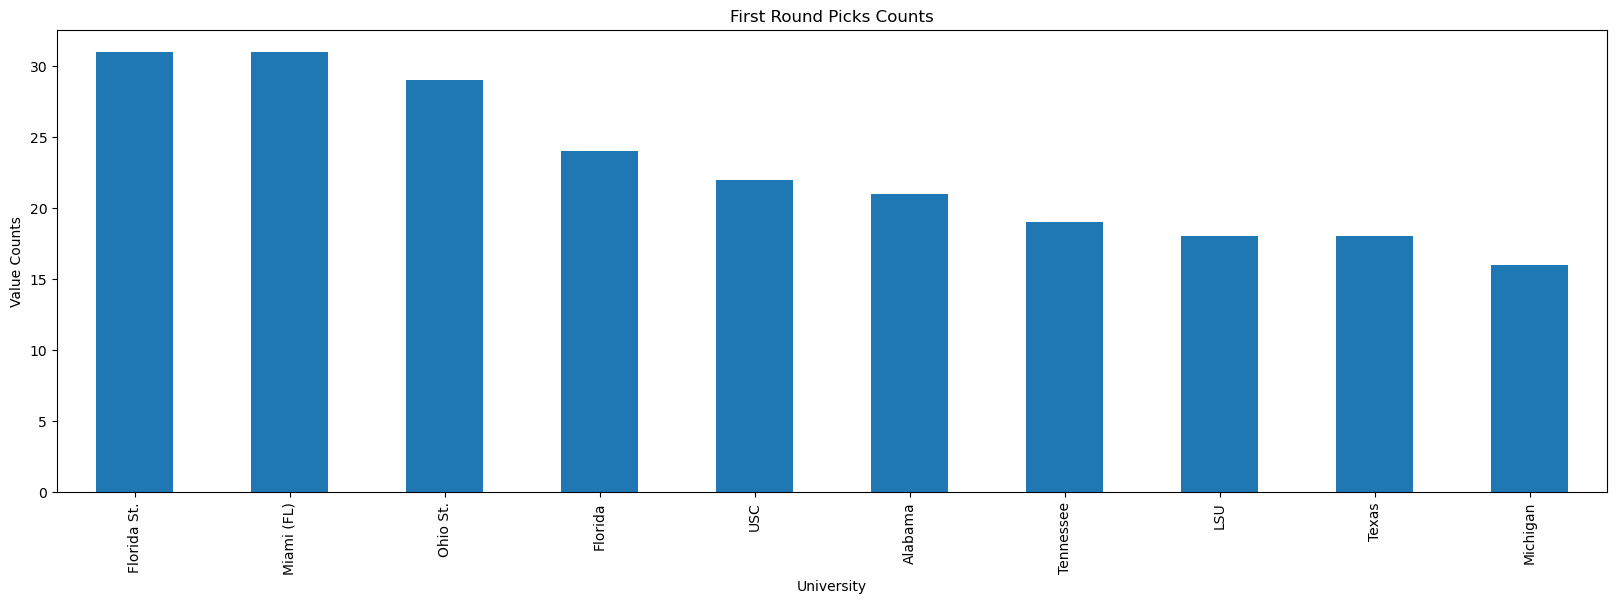

In [15]:
college_round = draft[draft['rnd'] == 1]['college_univ'].value_counts()
college_round = college_round[college_round >= 15]

plt.figure(figsize=(20,6))
college_round.plot(kind='bar')
plt.xlabel('University')
plt.ylabel('Value Counts')
plt.title('First Round Picks Counts')
plt.show()

We see a very similar trend in these bar charts. Florida St. is tied with Miami for the most first round draft picks. The 3 Florida school mentioned before are still in the top 5 schools for first round draft picks. Analyzing the top 10 schools, the schools that seem to most of their draft picks in the first round are Texas and Michigan. They are not in the top ten for overall draft picks but they are in the top ten for first round draft picks. 

In [ ]:
#Split the data into positional group for further analysis


qbs = draft[draft['pos'] == 'QB']
olbs = draft[draft['pos'] == 'OLB']
wrs = draft[draft['pos'] == 'WR']
tackles = draft[draft['pos'] == 'T']
DEs = draft[draft['pos'] == 'DE']
RBs = draft[draft['pos'] == 'RB']
cbs = draft[draft['pos'] == 'CB']
nt = draft[draft['pos'] == 'NT']
dt = draft[draft['pos'] == 'DT']
centers = draft[draft['pos'] == 'C']
gaurds = draft[draft['pos'] == 'G']
fs = draft[draft['pos'] == 'FS']
saftey = draft[draft['pos'] == 'S']
punters = draft[draft['pos'] == 'P']
ls = draft[draft['pos'] == 'LS']
ol = draft[draft['pos'] == 'OL']
dbs = draft[draft['pos'] == 'DB']
kickers = draft[draft['pos'] == 'K']
dl = draft[draft['pos'] == 'DL']
kr = draft[draft['pos'] == 'KR']

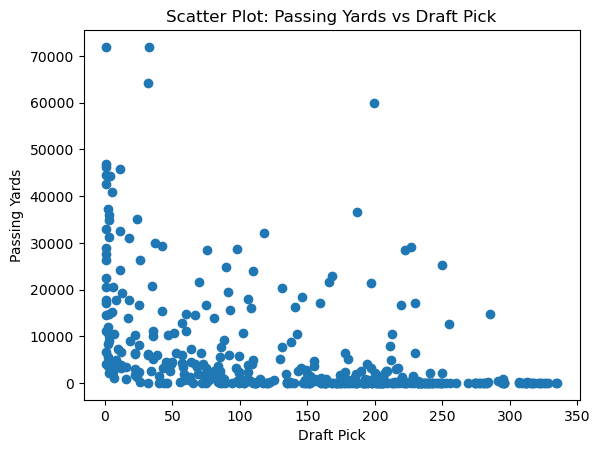

In [16]:
qbs['pass_yds'].corr(qbs['pick'])
plt.scatter(qbs['pick'], qbs['pass_yds'])
plt.xlabel("Draft Pick")
plt.ylabel("Passing Yards")
plt.title("Scatter Plot: Passing Yards vs Draft Pick")
plt.show()

There are a multiple trends that can be observed in this scatter plot. 
1. Most of the quarterbacks that are drafted do not end up throwing the ball for any significant amount, though it does seem that most of the players from round 1 have some passing yards
2. The players that were drafted in early rounds have the highest average passing yards. 
3. There is an outlier that passed for over 60,000 yards after being drafted around pick 200. I would guess that this is Tom Brady who was drafted at pick 199. 


In [11]:
draft['pos_numeric'] = draft['pos'].astype('category').cat.codes
draft

draft['pick'].corr(draft['pos_numeric'])

0.02511978423486256

### Green Bay Packers Specific Analysis

In [ ]:
#Filter to only Green Bay Packers Data 
GreenBay = draft[draft['tm'] == 'GNB']

pos
DB     50
WR     45
LB     41
T      26
DE     25
RB     24
DT     23
QB     21
G      15
TE     14
P       7
FB      5
K       3
C       3
NT      2
OL      1
DL      1
CB      1
OLB     1
FS      1
Name: count, dtype: int64


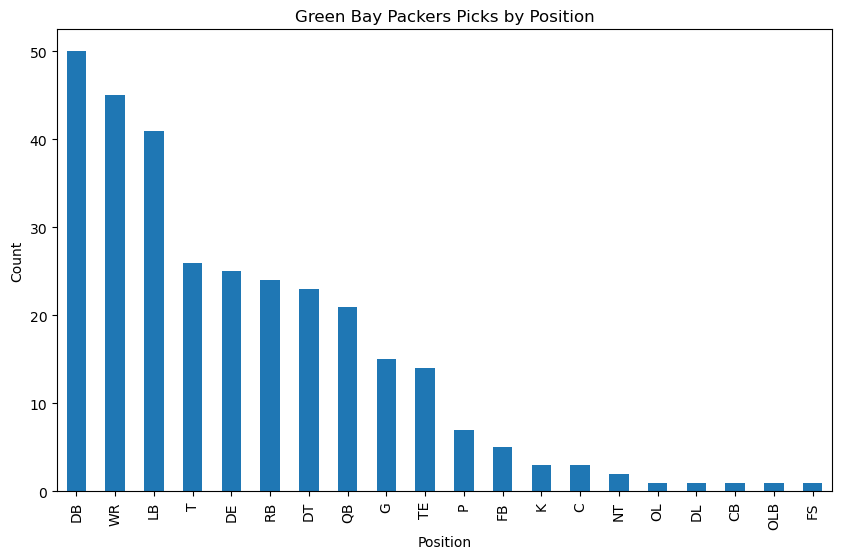

In [29]:
GreenbayPicks = GreenBay['pos'].value_counts()

print(GreenbayPicks)

plt.figure(figsize= (10,6))

GreenbayPicks.plot(kind = "bar")
plt.title("Green Bay Packers Picks by Position")
plt.xlabel("Position")
plt.ylabel("Count")
plt.show()

This plot shows that from 1985 to 2015 the packers have had a couple of very clear focueses in the draft being defensive backs, wide receivers, and linebackers. This does make sense because most teams have the most of these players rostered. It is also interesting to note that even though from 1985 - 2015 the Packers had two franchise quarter backs in Brett Favre and Aaron Rodgers they still drafted around 20 quaterbacks which means that in every 2 out of 3 drafts they were picking up a quaterback. 

In [42]:
draft[draft["player"] == 'Tom Brady']

,year,rnd,pick,tm,player,pos,position_standard,first4av,age,to,ap1,pb,st,carav,drav,g,cmp,pass_att,pass_yds,pass_td,pass_int,rush_att,rush_yds,rush_tds,rec,rec_yds,rec_tds,tkl,def_int,sk,college_univ,player_id,pos_numeric
4023,2000,6,199,NWE,Tom Brady,QB,QB,51,23.0,2016.0,2,11,14,160.0,160.0,231.0,5098.0,7998.0,59943.0,444.0,151.0,523.0,939.0,17.0,2.0,59.0,0.0,9.0,0.0,0,Michigan,Tom Brady_2000_NWE,18


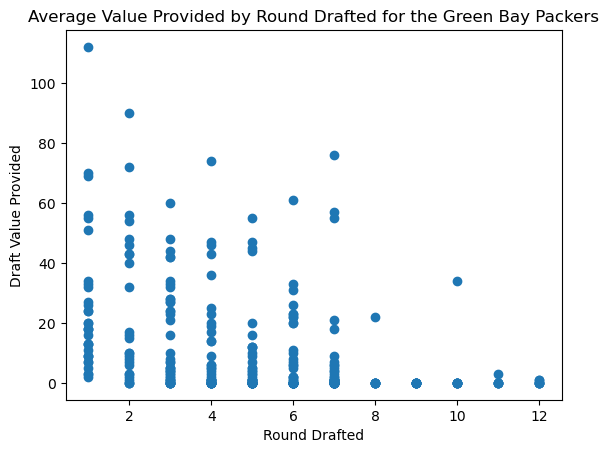

Average value per round: {1: 25.84, 2: 24.27, 3: 14.9, 4: 11.46, 5: 7.64, 6: 7.77, 7: 5.9, 8: 2.75, 9: 0.0, 10: 4.25, 11: 0.5, 12: 0.29}
Best Drafted Player: Aaron Rodgers


In [101]:
GBvalue = GreenBay['drav']
GBround = GreenBay['rnd']

plt.scatter(GBround,GBvalue)
plt.title('Average Value Provided by Round Drafted for the Green Bay Packers')
plt.xlabel('Round Drafted')
plt.ylabel('Draft Value Provided')
plt.show()

roundav = {}
for r in range(1, max(GreenBay['rnd']) + 1):
    avg = np.mean(GBvalue[GreenBay['rnd'] == r])
    roundav[r] = np.round(avg, 2)
    
print("Average value per round:", roundav)

BestPlayer = GreenBay['player'][GreenBay['drav'] == max(GBvalue)].iloc[0]
print('Best Drafted Player:', BestPlayer)

So we can see that they Packer have there most draft success in the first round which is to be expected but they also have a history of being quite good in the second round. We can also see that player that provided the most draft value to the team was Aaron Rodgers. 

In [84]:
avgallpro = 0
avgpb = 0
avgstarter = 0
avgbust = 0

for team in draft['tm'].unique():   
    byteam = draft[draft['tm'] == team]
    avgallpro += byteam[byteam['ap1'] > 0].shape[0]
    avgpb += byteam[byteam['pb'] > 0].shape[0]
    avgstarter += byteam[byteam['st'] > 0].shape[0]
    avgbust += byteam[byteam['ap1'] == 0].shape[0]

print("The average number of allpro players drafted by a team is:", avgallpro / 32) 
print("The average number of probowl players drafted by a team is:", avgpb / 32)  
print("The average number of starters drafted by a team is:", avgstarter / 32)  
print("The average number of players who never start drafted by a team is:", avgbust / 32)  


The average number of allpro players drafted by a team is: 10.21875
The average number of probowl players drafted by a team is: 26.59375
The average number of starters drafted by a team is: 112.0
The average number of players who never start drafted by a team is: 253.375


In [74]:
GBallpro = GreenBay[GreenBay['ap1'] > 0].shape[0]
GBpb = GreenBay[GreenBay['pb'] > 0].shape[0]
GBstarter = GreenBay[GreenBay['st'] > 0].shape[0]
GBbust = GreenBay[GreenBay['ap1'] == 0].shape[0]

print("Green Bay drafted,", GBallpro, ',first team all pro players')
print("Green Bay drafted,", GBpb, ',probowl players')
print("Green Bay drafted,", GBstarter, ",starters")
print("Green Bay drafted,", GBbust, ',players who never started a single game for them')

Green Bay drafted, 10 ,first team all pro players
Green Bay drafted, 35 ,probowl players
Green Bay drafted, 131 ,starters
Green Bay drafted, 299 ,players who never started a single game for them


Comparing the Packers to the rest of the league it seems that they have an about league average hit rate when it comes to first team all pro players, and an above average hit rate of both probowl and starter caliber players. They have also drafted more players than the average team that did not start for the organization which is a little concerning. However, a lot of these numbers could be influced by the longevity of the Green Bay Packers. This data starts in 1985 before the Carolina Panthers, Jacksonville Jaguars, Baltimore Ravens or Houston Texans were added to the league. Because of this discrepancy we will also examine average hit rate by teams to even out the years where teams have no data to provide. 

In [ ]:
allpro_count = draft.groupby('tm')['ap1'].apply(lambda x: (x > 0).sum())
pb_count     = draft.groupby('tm')['pb'].apply(lambda x: (x > 0).sum())
starter_count= draft.groupby('tm')['st'].apply(lambda x: (x > 0).sum())
bust_count = draft.groupby('tm')['st'].apply(lambda x: (x == 0).sum())

# --- Base counts ---
picks_by_team = draft.groupby('tm').size()
years_by_team = draft.groupby('tm')['year'].nunique()

# --- Hit rates ---
allpro_rate   = allpro_count / picks_by_team
pb_rate       = pb_count / picks_by_team
starter_rate  = starter_count / picks_by_team
bust_rate = bust_count / picks_by_team

# --- Combine into one DataFrame ---
summary = pd.DataFrame({
    'Total_Picks': picks_by_team,
    'Years_in_Data': years_by_team,
    'AllPro_Total': allpro_count,
    'ProBowl_Total': pb_count,
    'Starter_Total': starter_count,
    'AllPro_HitRate': allpro_rate,
    'ProBowl_HitRate': pb_rate,
    'Starter_HitRate': starter_rate,
    'NoneStarter_Rate': bust_rate
}).reset_index()

summary


,tm,Total_Picks,Years_in_Data,AllPro_Total,ProBowl_Total,Starter_Total,AllPro_HitRate,ProBowl_HitRate,Starter_HitRate,NoneStarter_Rate,AllPro_perYear,ProBowl_perYear,Starter_perYear,NonStarter_perYear
0,ARI,248,28,9,28,120,0.036290,0.112903,0.483871,0.516129,0.321429,1.000000,4.285714,4.571429
1,ATL,264,31,8,22,109,0.030303,0.083333,0.412879,0.587121,0.258065,0.709677,3.516129,5.000000
2,BAL,162,20,11,21,69,0.067901,0.129630,0.425926,0.574074,0.550000,1.050000,3.450000,4.650000
3,BUF,293,31,5,27,131,0.017065,0.092150,0.447099,0.552901,0.161290,0.870968,4.225806,5.225806
4,CAR,161,21,12,21,85,0.074534,0.130435,0.527950,0.472050,0.571429,1.000000,4.047619,3.619048
5,CHI,288,31,8,26,118,0.027778,0.090278,0.409722,0.590278,0.258065,0.838710,3.806452,5.483871
6,CIN,304,31,9,26,115,0.029605,0.085526,0.378289,0.621711,0.290323,0.838710,3.709677,6.096774
7,CLE,237,28,5,17,106,0.021097,0.071730,0.447257,0.552743,0.178571,0.607143,3.785714,4.678571
8,DAL,292,31,15,39,125,0.051370,0.133562,0.428082,0.571918,0.483871,1.258065,4.032258,5.387097
9,DEN,271,31,13,26,102,0.047970,0.095941,0.376384,0.623616,0.419355,0.838710,3.290323,5.451613


In [ ]:
leagueavgAP = np.mean(summary['AllPro_HitRate'])
leagueavgPB = np.mean(summary['ProBowl_HitRate'])
leagueavgST = np.mean(summary['Starter_HitRate'])
leagueavgBust = np.mean(summary['NoneStarter_Rate'])
GNBsummary = summary[summary['tm'] == 'GNB']


print("Greenbay All Pro average is:", np.round(GNBsummary['AllPro_HitRate'].iloc[0], 3),"vs. league average of:", np.round(leagueavgAP,3))
print("Greenbay ProBowl average is:", np.round(GNBsummary['ProBowl_HitRate'].iloc[0],3),"vs. league average of:", np.round(leagueavgPB,3))
print("Greenbay Starter average is:", np.round(GNBsummary['Starter_HitRate'].iloc[0],3),"vs. league average of:", np.round(leagueavgST,3))
print("Greenbay Nonstarter average is:", np.round(GNBsummary['NoneStarter_Rate'].iloc[0],3),"vs. league average of:", np.round(leagueavgBust,3))

Greenbay All Pro average is: 0.032 vs. league average of: 0.039
Greenbay ProBowl average is: 0.113 vs. league average of: 0.101
Greenbay Starter average is: 0.424 vs. league average of: 0.428
Greenbay Nonstarter average is: 0.576 vs. league average of: 0.572


The Green Bay Packers are about league average on drafting All Pro players at a rate of 0.032, better than league average at drafting ProBowlers at a rate of 0.113, slightly worse at drafting starters a rate of 0.424 and over half of their drafted players never start for the team which is slightly worse than league average. 

## Machine Learning Analysis

##### Because the Green Bay Packers appear to have a slightly worse track record than the rest of the league I am going to use Machine Learning to examine why. Perhaps they need to adjust their parameters for who to draft, maybe they need change their internal development programs, or maybe they have just gotten unlucky. I am going to perform machine learning using linear regression, classification trees, and random forests to get an idea of the traits that seem to aid teams in picking productive players i.e. a high careerav score. I am going to use the variables 'rnd', 'pick', 'pos', 'age', 'college_univ', 'year' to predict a players 'carav' score. Then I will run the packers players through the algorithm to determine what it would predict to be their carav. Then I will compare these scores to the players actual carav scores to help make a determination about process or developmental issues. 